# MOM6 ANALYSIS - 3D variables
## CONTENTS;
### 1. Load velocity data

In [1]:
import matplotlib.pyplot as plt
import cmocean as cm
import xarray as xr
import numpy as np
import glob

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import cartopy to plot maps
import cartopy.crs as ccrs
import cartopy.feature as feature
land_50m = feature.NaturalEarthFeature('physical', 'land', '50m', 
                                       edgecolor='black',
                                       facecolor='gray',
                                       linewidth=0.2)

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43659/status,
Dashboard: /proxy/43659/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33539,Workers: 7
Dashboard: /proxy/43659/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:37135,Total threads: 2
Dashboard: /proxy/41925/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:36747,


In [4]:
# set paths to model output
## SRM
eac_003 = '/scratch/v45/jr5971/mom6/archive/eac-003/'
## LRM
sthpac_01 = '/scratch/v45/jr5971/mom6/archive/southpac-01/'
## PARENT
access = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v150_iaf_cycle1/'

Right, so we've got our paths to the model output. Now we want to start by getting `surface speed` from each of the models. Does the ACCESS model have this?
* Looks like the best variable in ACCESS is the directional velocities;

In [5]:
def open_iaf_global(iaf_source = "/g/data/ik11/outputs/access-om2-01/01deg_jra55v150_iaf_cycle1", 
                    first_year = 1990,
                    last_year = 1995,
                    input_vars=['u','v','salt','temp','eta_t'],
                    frequency = "daily",
                    decode_times=False):

    year_range = range(first_year, last_year+1)
    filepaths = []
    for year in year_range:
        for var in input_vars:
            pattern = f'{iaf_source}/output*/ocean/ocean-*d-{var}*-1-{frequency}-mean-ym_{year}_*.nc'
            matches = glob.glob(pattern)
            filepaths.extend(matches)
    om2_iaf = xr.open_mfdataset(filepaths, decode_times=decode_times, parallel=True, 
                                chunks={'time':-1, 'yu_ocean':300, 'yt_ocean':300, 'xu_ocean':300, 'xt_ocean':300})
    return om2_iaf, filepaths

In [6]:
def open_mom6_files(path = '/scratch/v45/jr5971/mom6/archive/eac-003/',
                    years = 'all',
                    input_vars = ['u','v'],
                    frequency = 'daily'):
    filepaths = []
    for var in input_vars:
        pattern = f'{path}/output*/*{var}*.nc'
        matches = glob.glob(pattern)
        filepaths.extend(matches)
    # mom6_output = xr.open_mfdataset(filepaths, parallel=True)
    return filepaths  

In [7]:
%%time
eac_vel = open_mom6_files(path=eac_003)
eac_vel

CPU times: user 14 ms, sys: 7.17 ms, total: 21.2 ms
Wall time: 34.4 ms


['/scratch/v45/jr5971/mom6/archive/eac-003/output026/19930901.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output032/19940901.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output018/19920301.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output020/19920701.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output010/19901101.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output028/19940101.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output024/19930301.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output013/19910501.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output016/19911101.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output030/19940501.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output021/19920901.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output019/19920501.ocean_daily_u_

In [8]:
ds_u_ls = []
for file in eac_vel:
    try:
        ds = xr.open_dataset(file)
        ds_u_ls.append(ds)
    except:
        print(f'{file} DID NOT WORK')
    
    

/scratch/v45/jr5971/mom6/archive/eac-003/output028/19940101.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output024/19930301.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output030/19940501.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output021/19920901.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output022/19921101.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output029/19940301.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output025/19930601.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output027/19931101.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output038/19950901.ocean_daily_v_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output032/19940901.ocean_daily_v_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output020/19920701.ocean_dail

In [13]:
ds_u_ls = []
for file in eac_vel:
    try:
        ds = xr.open_dataset(file)
        ds_u_ls.append(ds)
    except:
        print(f'{file} DID NOT WORK')
    
    

/scratch/v45/jr5971/mom6/archive/eac-003/output018/19920301.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output028/19940101.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output024/19930301.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output030/19940501.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output021/19920901.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output022/19921101.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output029/19940301.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output025/19930601.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output027/19931101.ocean_daily_u_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output026/19930901.ocean_daily_v_3d.nc DID NOT WORK
/scratch/v45/jr5971/mom6/archive/eac-003/output038/19950901.ocean_dail

Right, so the 3D data looks pretty patchy - not sure if this is from the initial data move from pawsey to Acacia, or in the copying. But I've tried the copying multiple times and still it hasn't seemed to work so I'm suspicious about that initial move. 
* Let's explicitly try to load a file in this list to see if it works....

In [12]:
len(ds_u_ls)

20

## 1. KINETIC ENERGY MEAN-TRANSIENT DECOMPOSITION;
This is the first of several notebooks I'll be using to analyse the output of the mom6 regional experiments, also in comparison to the ACCESS-OM2-01 parent model that we use to force the nested models.

I'm starting with KE decomposition as this is of particular interest when moving to higher resolutions. Also, with MOM6 saving the `speed` variable at the surface, we should be able to perform the decomposition quite easily. 

In [6]:
# get vars from access;
om2_iaf, _ = open_iaf_global(input_vars=['u','v'],
                            decode_times=True)
om2_iaf

<xarray.Dataset>
Dimensions:         (xu_ocean: 3600, yu_ocean: 2700, st_ocean: 75,
                     st_edges_ocean: 76, time: 2191, nv: 2)
Coordinates:
  * xu_ocean        (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean        (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
  * st_ocean        (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 1.083 ... 5.61e+03 5.809e+03
  * time            (time) datetime64[ns] 1990-01-01T12:00:00 ... 1995-12-31T...
  * nv              (nv) float64 1.0 2.0
Data variables:
    u               (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(31, 75, 300, 300), meta=np.ndarray>
    average_T1      (time) datetime64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
    average_T2      (time) datetime64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
    average_DT      (time) timedelta64[ns] dask.array<chunksize=(31,), meta=np.ndarray>
    time_bnds       (time, nv) timedelta64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
    v               (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(31, 75, 300, 300), meta=np.ndarray>
Attributes:
    filename:   ocean-3d-u-1-daily-mean-ym_1990_01.nc
    title:      ACCESS-OM2-01
    grid_type:  mosaic
    grid_tile:  1
    history:    20221019T1337Z: /g/data/ik11/inputs/access-om2/bin/mppnccombi...

In [7]:
eac_u_files = glob.glob(eac_003+'output*/*u_3d.nc')
eac_v_files = glob.glob(eac_003+'output*/*v_3d.nc')
sthpac_u_files = glo

['/scratch/v45/jr5971/mom6/archive/eac-003/output026/19930901.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output018/19920301.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output020/19920701.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output010/19901101.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output028/19940101.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output024/19930301.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output013/19910501.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output016/19911101.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output030/19940501.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output021/19920901.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output019/19920501.ocean_daily_u_3d.nc',
 '/scratch/v45/jr5971/mom6/archive/eac-003/output023/19930101.ocean_daily_u_

In [17]:
# import speed data from regional models;
eac_files = glob.glob(eac_003+'output*/*daily.nc')
eac_daily = xr.open_mfdataset(eac_files)
sthpac_files = glob.glob(sthpac_01+ 'output*/*daily.nc')
sthpac_daily = xr.open_mfdataset(sthpac_files)
print(f'date range for eac; {eac_daily.time.min().values} - {eac_daily.time.max().values}')

date range for eac; 1990-01-01 12:00:00 - 1995-11-30 12:00:00


In [18]:
print(f'date range for sthpac; {sthpac_daily.time.min().values} - {sthpac_daily.time.max().values}')

date range for sthpac; 1990-01-01 12:00:00 - 1994-12-31 12:00:00


Right, so we've loaded in all the data. We can see that the smallest date range is from 1990 to the end of 1994 (5 years in total). Let's set this as our date range.

Next we need to subset spatial extent down to the smallest spatial extent which is the SRM (EAC-003) in this case. Let's get the coordinate limits of this and subset the PARENT and LRM models.

In [43]:
date_range = [str(sthpac_daily.time.min().values), str(sthpac_daily.time.max().values)]
# subset PARENT AND EAC in time;
access_daily = om2_iaf.sel(time=slice(date_range[0], date_range[1]))
eac_daily = eac_daily.sel(time=slice(date_range[0], date_range[1]))

In [44]:
# spatial extent;
yextent = [eac_daily.yh.min().values, eac_daily.yh.max().values]
xextent = [eac_daily.xh.min().values, eac_daily.xh.max().values]
# subset PARENT AND LRM
access_daily = access_daily.sel(xu_ocean = slice(xextent[0], xextent[1]), 
                           yu_ocean = slice(yextent[0], yextent[1])).isel(st_ocean=0, st_edges_ocean=0)
sthpac_daily = sthpac_daily.sel(xh=slice(xextent[0], xextent[1]),
                                yh=slice(yextent[0], yextent[1]))
print(f'sthpac new dims are: {sthpac_daily.dims}')
print(f'access new dims are: {access_daily.dims}')

sthpac new dims are: Frozen({'xh': 215, 'yh': 253, 'time': 1826, 'nv': 2})
access new dims are: Frozen({'xu_ocean': 214, 'yu_ocean': 252, 'time': 1826, 'nv': 2})


Okay so now we have all data cut down to the same region (roughly - as ACCESS is on B-grid, it has one extra gridcell compared to the mom6 model grids).

Let's get the speed variable from ACCESS first;

In [53]:
%%time
access_speed = np.sqrt(access_daily['u']**2 + access_daily['v']**2)
sthpac_speed = sthpac_daily['speed']
eac_speed = eac_daily['speed']
# Print dims;
print(f'access dims: {access_speed.shape}; \n sthpac dims: {sthpac_speed.shape}; \n eac dims: {eac_speed.shape}')

access dims: (1826, 252, 214); 
 sthpac dims: (1826, 253, 215); 
 eac dims: (1826, 759, 645)
CPU times: user 18.9 ms, sys: 4.48 ms, total: 23.4 ms
Wall time: 22.4 ms


Now a quick summary of the theory for decomposing KE;
### Decomposing the kinetic energy into time-mean and transient components;
#### Theory:
For a hydrostatic ocean model like MOM6, the relevant KE per unit mass is:
$$
KE = \frac{1}{2} (u^2 + v^2)
$$
i.e., proportional to the squared speed...

The vertical velocity component, $w$ does not appear in the mechanical energy budget. It is very much subdominant. But more fundamentally, it simply does not appear in the mechanical budget for a hydrostatic ocean.

For a non-steady fluid, we can define the time-averaged KE as the **Total KE**:
$$
TKE = <KE> = \frac{1}{T} \int^T_0 \frac{1}{2}(u^2+v^2)dt
$$

It is useful to decompose the velocity into time-mean and time-varying components, e.g., 
$$
u = \bar{u} + u'
$$
The **mean kinetic energy** is the energy associated with the mean flow;
$$ 
MKE = \frac{1}{2}(\bar{u}^2 + \bar{v}^2)
$$
The kinetic energy of the time-varying component is the **eddy kinetic energy**, EKE. This quantity can be obtained by subtracting the velocity means, and calculating the KE of the perturbation velocity quantities:
$$
EKE = \bar{\frac{1}{2}[(u-\bar{u})^2+(v-\bar{v})^2]}
$$
MKE and EKE partition the total kinetic energy.
$$
TKE = MKE + EKE
$$

In [54]:
%%time
# mean speeds...
access_speed_mean = access_speed.mean('time').compute()
sthpac_speed_mean = sthpac_speed.mean('time').compute()
eac_speed_mean = eac_speed.mean('time').compute()

CPU times: user 16.6 s, sys: 2.42 s, total: 19.1 s
Wall time: 2min 36s


In [55]:
%%time
# transients / residual...
access_speed_eddy = access_speed - access_speed_mean
sthpac_speed_eddy = sthpac_speed - sthpac_speed_mean
eac_speed_eddy = eac_speed - eac_speed_mean

CPU times: user 25.1 ms, sys: 824 µs, total: 25.9 ms
Wall time: 26.3 ms


In [56]:
%%time
# EDDY KINETIC ENERGY
EKE_access = (0.5*(access_speed_eddy**2)).compute()
EKE_sthpac = (0.5*(sthpac_speed_eddy**2)).compute()
EKE_eac = (0.5*(eac_speed_eddy**2)).compute()

CPU times: user 12.4 s, sys: 7.96 s, total: 20.3 s
Wall time: 1min 3s


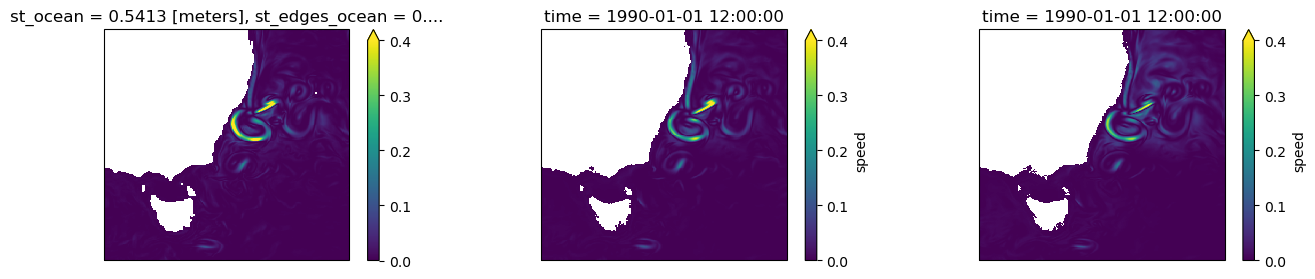

In [65]:
# PLOT SNAPSHOT
fig, axs = plt.subplots(ncols=3, figsize=(16,3), subplot_kw = {'projection':ccrs.PlateCarree()})
EKE_access[0,:].plot(ax=axs[0], vmax=0.4)
EKE_sthpac[0,:].plot(ax=axs[1], vmax=0.4)
EKE_eac[0,:].plot(ax=axs[2], vmax=0.4)

In [67]:
%%time 
# Calculate Mean over time for each model
EKE_access_mean = EKE_access.mean('time')
EKE_sthpac_mean = EKE_sthpac.mean('time')
EKE_eac_mean = EKE_eac.mean('time')

CPU times: user 3.72 s, sys: 1.44 s, total: 5.16 s
Wall time: 4.64 s


Text(0.5, 1.0, 'EAC-003')

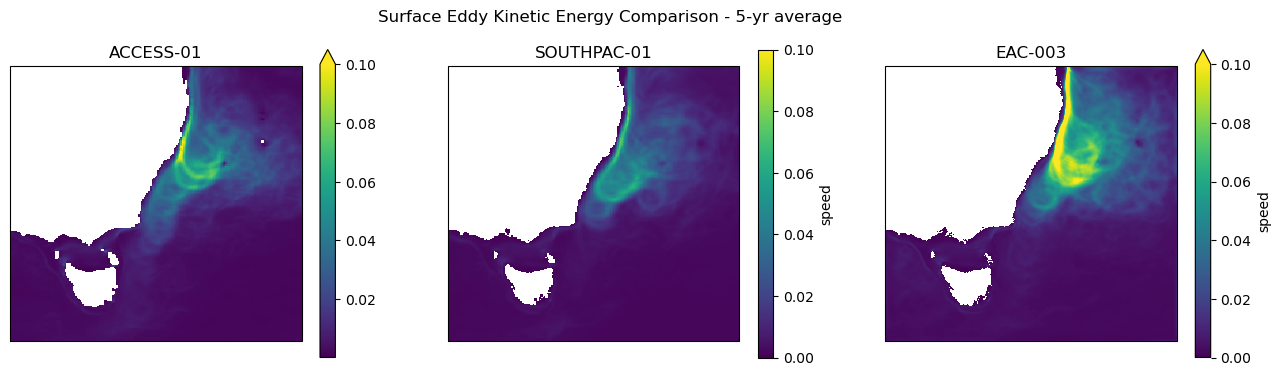

In [76]:
# PLOT AVERAGE OVER TIME
fig, axs = plt.subplots(ncols=3, figsize=(16,4), subplot_kw = {'projection':ccrs.PlateCarree()})
EKE_access_mean.plot(ax=axs[0], vmax=0.1)
EKE_sthpac_mean.plot(ax=axs[1], vmax=0.1)
EKE_eac_mean.plot(ax=axs[2], vmax=0.1)
fig.suptitle('Surface Eddy Kinetic Energy Comparison - 5-yr average')
axs[0].set_title("ACCESS-01")
axs[1].set_title("SOUTHPAC-01")
axs[2].set_title("EAC-003")

I have to bear in mind that these figures are just placeholders and might not show the full story. I'm hoping that when I run the model again, I won't have the spuriously high amplification of poleward velocities at the northern boundary of the EAC jet.

## 2. Compare SSH model output and observations;
Specifically we plot the time-mean and standard deviation of SSH and compare it to those obtained from observations from CMEMS satellite altimetry (former AVISO + dataset). 

In [6]:
om2_ssh,_ = open_iaf_global(input_vars=['eta_t'],
                           decode_times=True)

In [7]:
# import daily data from regional models;
eac_files = glob.glob(eac_003+'output*/*daily.nc')
eac_daily = xr.open_mfdataset(eac_files)
sthpac_files = glob.glob(sthpac_01+ 'output*/*daily.nc')
sthpac_daily = xr.open_mfdataset(sthpac_files)
print(f'date range for eac; {eac_daily.time.min().values} - {eac_daily.time.max().values}')

date range for eac; 1990-01-01 12:00:00 - 1995-11-30 12:00:00


In [8]:
print(f'date range for sthpac; {sthpac_daily.time.min().values} - {sthpac_daily.time.max().values}')

date range for sthpac; 1990-01-01 12:00:00 - 1994-12-31 12:00:00


Right, so we've loaded in all the data. We can see that the smallest date range is from 1990 to the end of 1994 (5 years in total). Let's set this as our date range.

Next we need to subset spatial extent down to the smallest spatial extent which is the SRM (EAC-003) in this case. Let's get the coordinate limits of this and subset the PARENT and LRM models.

In [9]:
date_range = [str(sthpac_daily.time.min().values), str(sthpac_daily.time.max().values)]
# subset PARENT AND EAC in time;
access_daily = om2_ssh.sel(time=slice(date_range[0], date_range[1]))
eac_daily = eac_daily.sel(time=slice(date_range[0], date_range[1]))['zos']

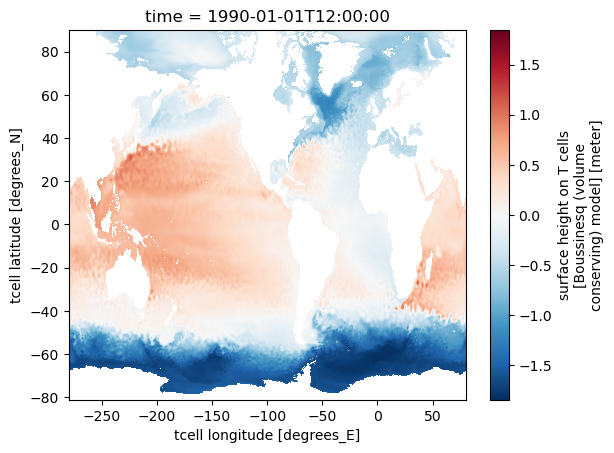

In [10]:
access_daily['eta_t'].isel(time=0).plot()

In [11]:
# spatial extent;
yextent = [eac_daily.yh.min().values, eac_daily.yh.max().values]
xextent = [eac_daily.xh.min().values, eac_daily.xh.max().values]
# subset PARENT AND LRM
access_daily = access_daily.sel(xt_ocean = slice(xextent[0], xextent[1]), 
                           yt_ocean = slice(yextent[0], yextent[1]))['eta_t']
sthpac_daily = sthpac_daily.sel(xh=slice(xextent[0], xextent[1]),
                                yh=slice(yextent[0], yextent[1]))['zos']
print(f'sthpac new dims are: {sthpac_daily.dims}')
print(f'access new dims are: {access_daily.dims}')

sthpac new dims are: ('time', 'yh', 'xh')
access new dims are: ('time', 'yt_ocean', 'xt_ocean')


### Load CMEMS satellite observational data;
Load the CMEMS dataset and select `adt` the sea surface height variable name.

In [ ]:
filenames = glob.glob("/g/data/ua8/CMEMS_SeaLevel/timeseries/*.nc")
cmems = xr.open_mfdataset(filenames, parallel=True)

obs_ssh = cmems.adt
obs_ssh = obs_ssh.sel(time=slice(date_range[0], date_range[1]), 
                      lat=slice(yextent[0], yextent[1]),
                      lon=slice(xextent[0], xextent[1]))
obs_ssh = obs_ssh.rename('adt_cmems')
obs_ssh

Compute the mean and standard deviations to plot. We add `.load()` so to enforce computations. For the `std` calculations we provide `skipna=False` option to tell xarray to ignore the points on land that have `NaN` values. This way it doesn't try to divide by a zero-length series while computing the standard deviation. (If we didn't provide `skipna=False` we'd get the same answer but with a bunch of `RuntimeWarnings`). 

In [16]:
%%time
model_ls = [access_daily, sthpac_daily, eac_daily]
mean_ls = []
std_ls = []
for model in model_ls:
    model_mean = model.mean(dim='time').load()
    model_std = model.std(dim='time', skipna=False).load()
    mean_ls.append(model_mean)
    std_ls.append(model_std)
    print(f"finished {str(model.name)}")

finished eta_t
finished zos
finished zos
CPU times: user 4.26 s, sys: 576 ms, total: 4.83 s
Wall time: 27.1 s


### Plot & Compare
Plot the time-mean and standard deviation of both of the model outputs and the CMEMS observational dataset.

Text(0.5, 0.98, 'Mean daily SSH: First 5-yrs (1990-01 to 1994-12)')

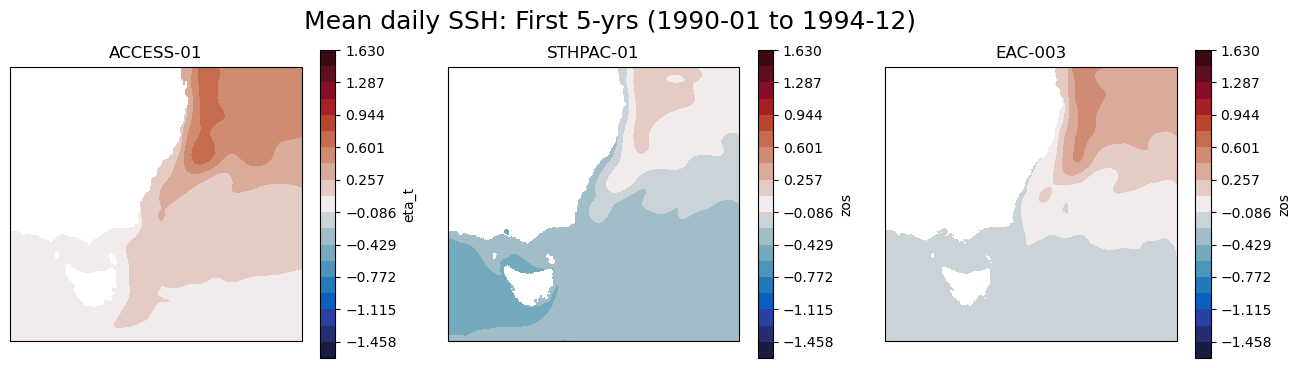

In [14]:
model_names = ['ACCESS-01', 'STHPAC-01', 'EAC-003']
projection = ccrs.PlateCarree()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4),
                         subplot_kw={'projection':projection})
max_std=0.3
max_mean=1.63

# mean SSH plots
for i, ax in enumerate(axes.flatten()):
    p = mean_ls[i].plot.contourf(ax=ax, cmap=cm.cm.balance,
                        vmin=-max_mean, vmax=max_mean, 
                        add_colorbar=True, levels=20)
    ax.set_title(model_names[i])
fig.suptitle('Mean daily SSH: First 5-yrs (1990-01 to 1994-12)', fontsize=18)

Okay, so from the global snapshot earlier, we see that the SSH (`eta_t`) in this case is pretty much positive until around 50 degrees South. This is why we are seeing all positive values for SSH in this region, whereas the regional models seem more well-balanced, i.e., positive anomalies in the northern regions, negative anomalies in the southern regions. But the question is **are the ssh anomalies (`zos`) in the regional models taken relative to some reference level *specific* to the domain limits?** If so, we'd expect the **reference levels to be different** and hence why the mean SSH values look quite different between the two. 

A better understanding of SSH for this circumstance is to look at the variance. 

Text(0.5, 0.98, 'Variance (std) | daily SSH: First 5-yrs (1990-01 to 1994-12)')

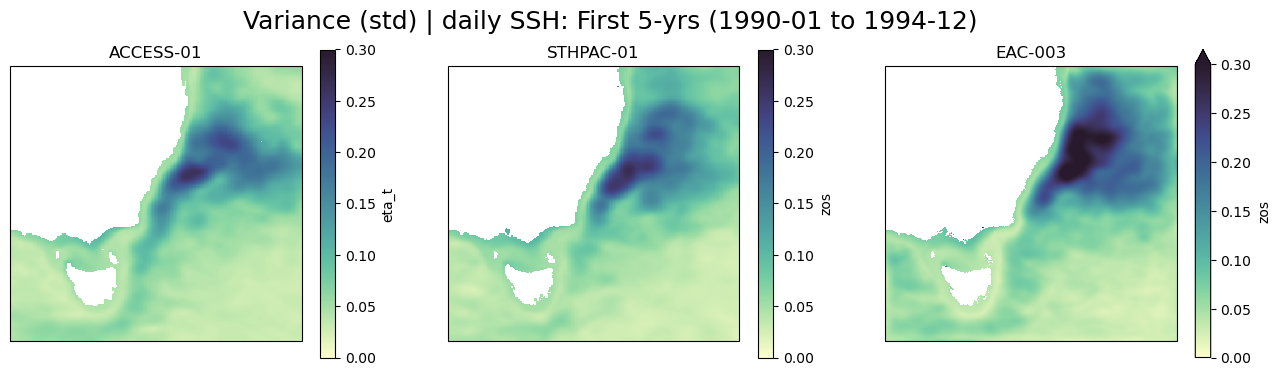

In [21]:
model_names = ['ACCESS-01', 'STHPAC-01', 'EAC-003']
projection = ccrs.PlateCarree()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4),
                         subplot_kw={'projection':projection})
max_std=0.3
max_mean=1.63

# mean SSH plots
for i, ax in enumerate(axes.flatten()):
    p = std_ls[i].plot(ax=ax, cmap=cm.cm.deep,
                        vmin=0, vmax=max_std, 
                        add_colorbar=True)
    ax.set_title(model_names[i])
fig.suptitle('Variance (std) | daily SSH: First 5-yrs (1990-01 to 1994-12)', fontsize=18)